In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# dataset predicts is company will go bankrupt in the next year and probability it will go bankrupt in k number of years
data = pd.read_csv("data/1_american_dataset.csv")

In [2]:
data.head()

,cik,fyear,company_name,tic,status_label,current_assets,total_assets,cost_of_goods_sold,total_long_term_debt,depreciation_and_amortization,...,total_current_liabilities,net_income,retained_earnings,total_receivables,total_revenue,market_value,total_liabilities,net_sales,total_operating_expenses,status
0,1750,1999.0,AAR CORP,AIR,alive,511.267,740.998,833.107,180.447,18.373,...,163.816,35.163,201.026,128.348,1024.333,372.7519,401.483,1024.333,935.302,0
1,1750,2000.0,AAR CORP,AIR,alive,485.856,701.854,713.811,179.987,18.577,...,125.392,18.531,204.065,115.187,874.255,377.1180,361.642,874.255,809.888,0
2,1750,2001.0,AAR CORP,AIR,alive,436.656,710.199,526.477,217.699,22.496,...,150.464,-58.939,139.603,77.528,638.721,364.5928,399.964,638.721,611.514,0
3,1750,2002.0,AAR CORP,AIR,alive,396.412,686.621,496.747,164.658,27.172,...,203.575,-12.410,124.106,66.322,606.337,143.3295,391.633,606.337,575.592,0
4,1750,2003.0,AAR CORP,AIR,alive,432.204,709.292,523.302,248.666,26.680,...,131.261,3.504,131.884,104.661,651.958,308.9071,407.608,651.958,604.467,0


In [3]:
data.shape
data.info()
data.isnull().sum()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cik                            78682 non-null  int64  
 1   fyear                          78682 non-null  float64
 2   company_name                   78682 non-null  object 
 3   tic                            78682 non-null  object 
 4   status_label                   78682 non-null  object 
 5   current_assets                 78682 non-null  float64
 6   total_assets                   78682 non-null  float64
 7   cost_of_goods_sold             78682 non-null  float64
 8   total_long_term_debt           78682 non-null  float64
 9   depreciation_and_amortization  78682 non-null  float64
 10  ebit                           78682 non-null  float64
 11  ebitda                         78682 non-null  float64
 12  gross_profit                   78682 non-null 

cik                                int64
fyear                            float64
company_name                      object
tic                               object
status_label                      object
current_assets                   float64
total_assets                     float64
cost_of_goods_sold               float64
total_long_term_debt             float64
depreciation_and_amortization    float64
ebit                             float64
ebitda                           float64
gross_profit                     float64
inventory                        float64
total_current_liabilities        float64
net_income                       float64
retained_earnings                float64
total_receivables                float64
total_revenue                    float64
market_value                     float64
total_liabilities                float64
net_sales                        float64
total_operating_expenses         float64
status                             int64
dtype: object

In [13]:
import seaborn as sns
# import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

In [18]:
df = data.select_dtypes(include=['float64','int64'])
df.head()

,cik,fyear,current_assets,total_assets,cost_of_goods_sold,total_long_term_debt,depreciation_and_amortization,ebit,ebitda,gross_profit,...,total_current_liabilities,net_income,retained_earnings,total_receivables,total_revenue,market_value,total_liabilities,net_sales,total_operating_expenses,status
0,1750,1999.0,511.267,740.998,833.107,180.447,18.373,70.658,89.031,191.226,...,163.816,35.163,201.026,128.348,1024.333,372.7519,401.483,1024.333,935.302,0
1,1750,2000.0,485.856,701.854,713.811,179.987,18.577,45.790,64.367,160.444,...,125.392,18.531,204.065,115.187,874.255,377.1180,361.642,874.255,809.888,0
2,1750,2001.0,436.656,710.199,526.477,217.699,22.496,4.711,27.207,112.244,...,150.464,-58.939,139.603,77.528,638.721,364.5928,399.964,638.721,611.514,0
3,1750,2002.0,396.412,686.621,496.747,164.658,27.172,3.573,30.745,109.590,...,203.575,-12.410,124.106,66.322,606.337,143.3295,391.633,606.337,575.592,0
4,1750,2003.0,432.204,709.292,523.302,248.666,26.680,20.811,47.491,128.656,...,131.261,3.504,131.884,104.661,651.958,308.9071,407.608,651.958,604.467,0


In [27]:

model = LinearRegression()

X = df["total_assets"]  # select all columns except the last one
y = df.iloc[:, -1]   # select only the last column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X[0])


740.998


In [23]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [28]:
a = np.vstack((X_train, y_train))
b = np.vstack((X_test, y_test))

In [ ]:
model.fit(a,b)

<AxesSubplot:>

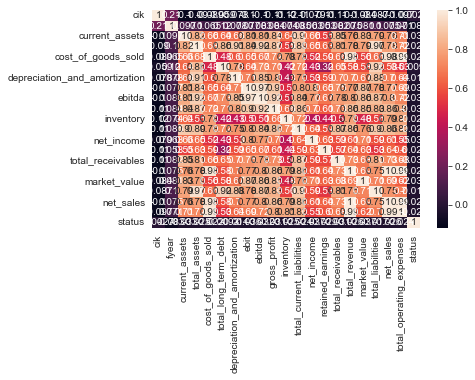

In [6]:
# fix overlap of values
sns.heatmap(data.corr(), annot= True)